# 2D Rosenbrock, constrained

Let's do another example with the Rosenbrock problem that we just solved.

Let's try adding a constraint to the problem that we previously solved. Recall that the unconstrained optimum that we found occured at $x=1$, $y=1$.

What if we want to know the minimum function value that is still within the unit circle. Clearly, $(1, 1)$ is not inside the unit circle, so we expect to find a different answer. Here's what the problem looks like, constrained to be inside the unit circle:

In [33]:
def rosenbrock(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

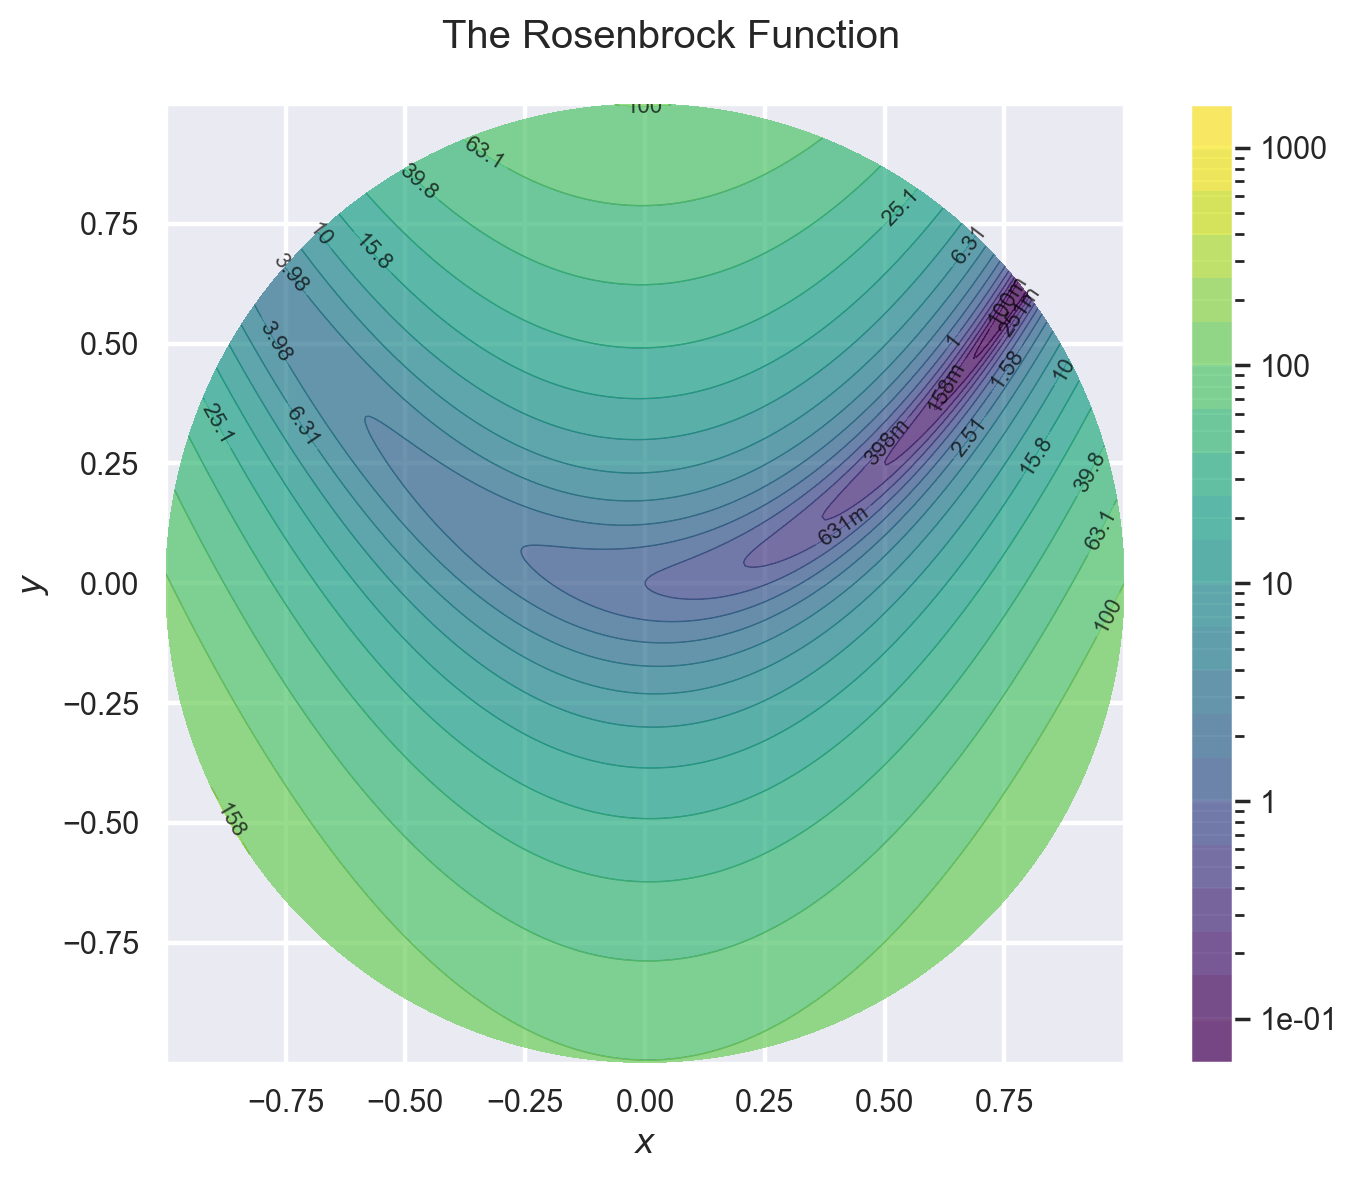

In [34]:
### Don't worry about this code block; this is just here to visualize the function.
from aerosandbox.tools.pretty_plots import plt, show_plot, contour, mpl, equal
import aerosandbox.numpy as np
fig, ax = plt.subplots(figsize=(7.5, 6), dpi=200)
xi, eta = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
X, Y = xi * np.sqrt(1 - eta ** 2 / 2), eta * np.sqrt(1 - xi ** 2 / 2)
rng = (1e-1, 1e3)
_, _, cbar = contour(X, Y, rosenbrock(X, Y),
                     levels=np.geomspace(*rng, 21), norm=mpl.colors.LogNorm(*rng, clip=True),
                     linelabels_fontsize=8, cmap=plt.get_cmap("viridis"), zorder=3)
equal()
cbar.ax.yaxis.set_major_locator(mpl.ticker.LogLocator()); cbar.ax.yaxis.set_major_formatter(mpl.ticker.LogFormatter())
show_plot("The Rosenbrock Function", "$x$", "$y$")

Seems like the optimum is going to be some point vaguely near $(1,1)$, but loosely "projected" back onto the constraint boundary - roughly $(0.8, 0.6)$.

----

Let's see what we get when we optimize this new constrained problem with the `Opti` stack.

First, we set up the optimization environment and variables:

In [35]:
import aerosandbox as asb

opti = asb.Opti()

### Define optimization variables
x = opti.variable(init_guess=1)  # Let's change our initial guess to the value we found before, (1, 1).
y = opti.variable(init_guess=1)  # As above, change 0 -> 1

Next, we define the objective. Recall that we defined `rosenbrock()` above - we'll use that here!

The lesson: you can use functions, classes, etc. arbitrarily to simplify and organize your code. Don't forget that this is Python, with all its bells and whistles! :)

In [36]:
### Define objective
opti.minimize(rosenbrock(x, y))

Now, we set up our constraint. Note the natural syntax to add a constraint with `opti.subject_to()`:

In [37]:
### Define constraint
r = (x ** 2 + y ** 2) ** 0.5  # r is the distance from the origin
opti.subject_to(
    r <= 1  # Constrain the distance from the origin to be less than or equal to 1.
)

MX(fabs(opti2_lam_g_1))

A few notes here:
* In continuous optimization, there is no practical difference between "less than" and "less than or equal to". (At least, not when we solve them numerically on a computer - this is not true for analytical solutions, but that's not relevant here.) So, use `<` or `<=`, whatever feels best to you.
* Our initial guess $(1, 1)$ is *infeasible* - it's outside of the unit circle. Not to worry, as initial guesses do not need to be feasible - this will solve just fine.

Let's continue and solve our problem:

In [38]:
# Optimize
sol = opti.solve()

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 0

Again, we get lots of info about how the solve went that will be useful later on. For now, let's see what our optimal solution looks like:

In [39]:
# Extract values at the optimum
x_opt = sol.value(x)
y_opt = sol.value(y)

# Print values
print(f"x = {x_opt}")
print(f"y = {y_opt}")

x = 0.7864151598262832
y = 0.6176983214426718


The optimal point that we've found is $(0.786, 0.618)$. Let's check that it lies on the unit circle.

In [40]:
r_opt = sol.value(r)  # Note that sol.value() can be used to evaluate any object, not just design variables.

print(f"r = {r_opt}")

r = 1.0000000099588464


It does!

We could prove optimality here once again via hand calculations should we choose, but for now we'll take the optimizer's word for it. (The hand-calc process is a bit more complicated than before, but not bad. First, we would show that first-order optimality (i.e. $\nabla \vec{x} = 0$) can't be satisfied anywhere in the feasible space, which would indicate that our inequality constraint is tight. Then, we would derive the KKT conditions for constrained optimality and then solve for $x$, $y$, and the Lagrange multiplier associated with our constraint.)